# Store US Stock Prices in HDF5 Format

## Imports

In [1]:
!pip3 install quandl
import quandl
import zipline
from zipfile import *
import pandas as pd

## Load source data

In [2]:
quandl.read_key()
s=quandl.ApiConfig.api_key
quandl.ApiConfig.api_key=s.strip()

quandl.export_table("WIKI/PRICES",filename="/Users/lcheong/Documents/01_env_and_data/us_stocks.zip")
with ZipFile("/Users/lcheong/Documents/01_env_and_data/us_stocks.zip", 'r') as zip_ref:
    zip_ref.extractall("/Users/lcheong/Documents/01_env_and_data")
    
print (zip_ref.namelist())
for i in zip_ref.namelist():
    df = pd.read_csv(i)

print(df.head())

['WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv']
  ticker        date   open   high    low  close      volume  ex-dividend  \
0      A  1999-11-18  45.50  50.00  40.00  44.00  44739900.0          0.0   
1      A  1999-11-19  42.94  43.00  39.81  40.38  10897100.0          0.0   
2      A  1999-11-22  41.31  44.00  40.06  44.00   4705200.0          0.0   
3      A  1999-11-23  42.50  43.63  40.25  40.25   4274400.0          0.0   
4      A  1999-11-24  40.13  41.94  40.00  41.06   3464400.0          0.0   

   split_ratio   adj_open   adj_high    adj_low  adj_close  adj_volume  
0          1.0  31.041951  34.112034  27.289627  30.018590  44739900.0  
1          1.0  29.295415  29.336350  27.160002  27.548879  10897100.0  
2          1.0  28.183363  30.018590  27.330562  30.018590   4705200.0  
3          1.0  28.995229  29.766161  27.460188  27.460188   4274400.0  
4          1.0  27.378319  28.613174  27.289627  28.012803   3464400.0  


## Apply required transformations

In [4]:
#Convert date column to datetime format
df = pd.read_csv('WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv')
print(df.info())
df['date'] =  pd.to_datetime(df['date'])
print("CONVERTED DATE COLUMN TO DATETIME FORMAT")
print(df.info())
print(df.head())
#Select stock price from year 2000 onwards
df = df[~(df['date'] < '2000-01-01')]
print("FROM 2000-01-01 ONWARDS")
print(df.head())
#Set ticker and date as index
df = df.set_index(['ticker','date'])
print("INDEX SET")
print(df.info())
print(df.head())
#Keep only the adjusted open, low, high, close, and volume (OHLCV) prices, and rename by removing the adj_ prefix.
df = df.drop(columns=['open','high','low','close','volume','ex-dividend','split_ratio'])
print("BEFORE RENAMING")
print(df.head())
print("AFTER RENAMING")
df.rename(columns={'adj_open':'open','adj_high':'high','adj_low':'low','adj_close':'close','adj_volume':'volume'}, inplace=True)
print(df.head())
#Pick a ticker, A for Agilent Technologies
dataframe=df.loc['A']
print(dataframe.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389314 entries, 0 to 15389313
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ticker       object 
 1   date         object 
 2   open         float64
 3   high         float64
 4   low          float64
 5   close        float64
 6   volume       float64
 7   ex-dividend  float64
 8   split_ratio  float64
 9   adj_open     float64
 10  adj_high     float64
 11  adj_low      float64
 12  adj_close    float64
 13  adj_volume   float64
dtypes: float64(12), object(2)
memory usage: 1.6+ GB
None
CONVERTED DATE COLUMN TO DATETIME FORMAT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389314 entries, 0 to 15389313
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ticker       object        
 1   date         datetime64[ns]
 2   open         float64       
 3   high         float64       
 4   low          float64       
 5   close        float6

## Plot data

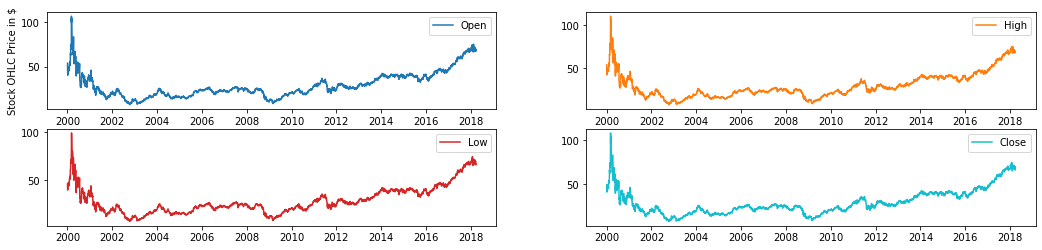

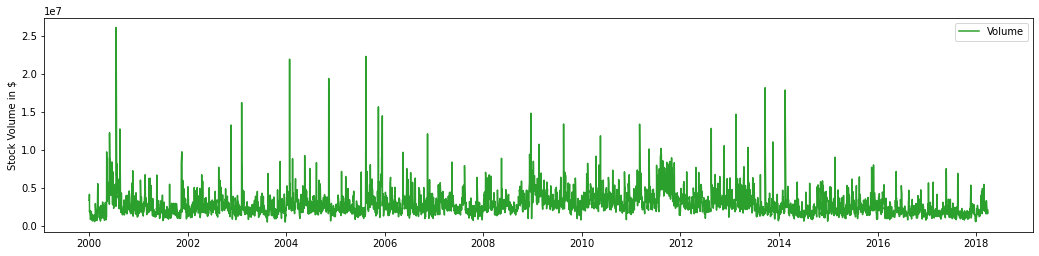

In [5]:
import matplotlib.pyplot as plt
cm=1/2.54

fig,((ax1a,ax1b),(ax2a,ax2b)) = plt.subplots(2,2, figsize=(45*cm, 10*cm))
ax1a.plot(dataframe.index, dataframe["open"], color ='tab:blue', label="Open")
ax1a.legend(loc=0)
ax1b.plot(dataframe.index, dataframe["high"], color ='tab:orange', label="High")
ax1b.legend(loc=0)
ax2a.plot(dataframe.index, dataframe["low"], color='tab:red', label="Low")
ax2a.legend(loc=0)
ax2b.plot(dataframe.index, dataframe["close"], color='tab:cyan', label="Close")
ax2b.legend(loc=0)
ax1a.set_ylabel('Stock OHLC Price in $')  

fig, ax2 = plt.subplots(1,1, figsize=(45*cm, 10*cm) )    
ax2.plot(dataframe.index, dataframe["volume"], color ='tab:green', label="Volume")
ax2.set_ylabel('Stock Volume in $')  
plt.legend(loc=0)
plt.show()

## Store in HDF5 format

In [6]:
import h5py
df.to_hdf('us_stocks.h5', key='df', mode='w')